# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download the Bihar election result Dataset](https://www.kaggle.com/datasets/etqadahmadkhan/bihar-polls-2025/data)

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('bihar_election_results.csv')

### Frist five row

In [3]:
df.head()

,Constituency Number,Constituency Name,Serial Number,Candidate Name,Party,EVM Votes,Postal Votes,Total Votes,Vote Percentage
0,1,VALMIKI NAGAR,1,DHIRENDRA PRATAP SINGH ALIAS RINKU SINGH,Janata Dal (United),105771,284,106055,45.39
1,1,VALMIKI NAGAR,2,RAMESHWAR YADAV,Bahujan Samaj Party,5294,18,5312,2.27
2,1,VALMIKI NAGAR,3,SURENDRA PRASAD,Indian National Congress,107374,356,107730,46.11
3,1,VALMIKI NAGAR,4,RAJESH SHARMA,Lok Samaj Party,2301,2,2303,0.99
4,1,VALMIKI NAGAR,5,AZHARUDDIN ANSARI,Independent,1553,1,1554,0.67


### last Five row

In [4]:
df.tail()

,Constituency Number,Constituency Name,Serial Number,Candidate Name,Party,EVM Votes,Postal Votes,Total Votes,Vote Percentage
2854,243,CHAKAI,7,CHANDAN KUMAR SINGH,Independent,12484,18,12502,5.37
2855,243,CHAKAI,8,RANJIT KUMAR VERMA,Independent,2394,0,2394,1.03
2856,243,CHAKAI,9,SANJAY PRASAD,Independent,48026,39,48065,20.64
2857,243,CHAKAI,10,SOSANA MURMU,Independent,3980,0,3980,1.71
2858,243,CHAKAI,11,NOTA,None of the Above,4519,3,4522,1.94


### Shape of our dataset

In [5]:
df.shape

(2859, 9)

### List out all columns

In [6]:
df.columns

Index(['Constituency Number', 'Constituency Name', 'Serial Number',
       'Candidate Name', 'Party', 'EVM Votes', 'Postal Votes', 'Total Votes',
       'Vote Percentage'],
      dtype='object')

### Datatype of each columns

In [7]:
df.dtypes

Constituency Number      int64
Constituency Name       object
Serial Number            int64
Candidate Name          object
Party                   object
EVM Votes                int64
Postal Votes             int64
Total Votes              int64
Vote Percentage        float64
dtype: object

### Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Constituency Number  2859 non-null   int64  
 1   Constituency Name    2859 non-null   object 
 2   Serial Number        2859 non-null   int64  
 3   Candidate Name       2859 non-null   object 
 4   Party                2859 non-null   object 
 5   EVM Votes            2859 non-null   int64  
 6   Postal Votes         2859 non-null   int64  
 7   Total Votes          2859 non-null   int64  
 8   Vote Percentage      2859 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 201.2+ KB


### Check Null Value

In [9]:
df.isnull().sum()

Constituency Number    0
Constituency Name      0
Serial Number          0
Candidate Name         0
Party                  0
EVM Votes              0
Postal Votes           0
Total Votes            0
Vote Percentage        0
dtype: int64

# EDA

In [10]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

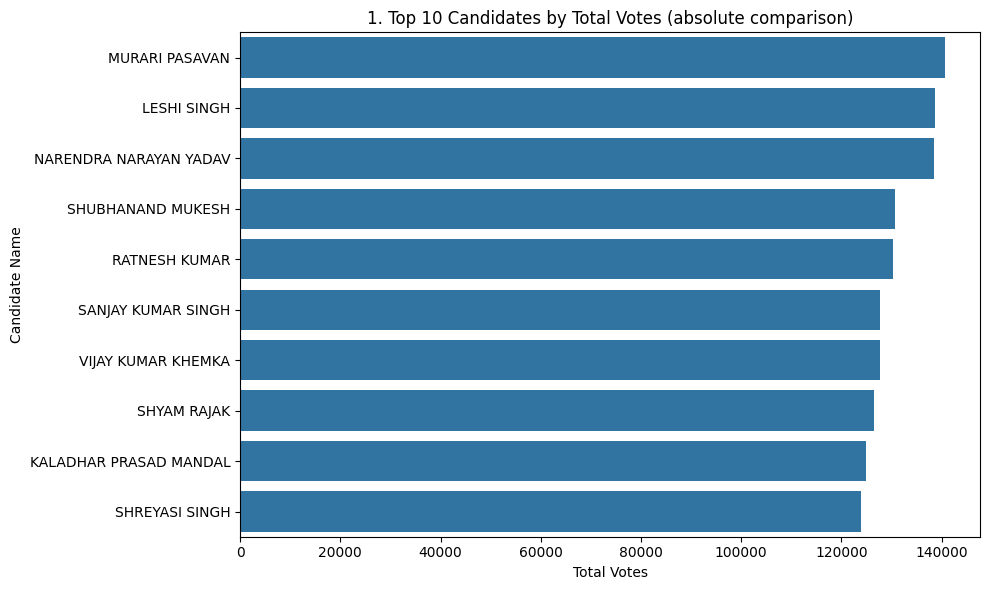

In [11]:
fig = plt.figure(figsize=(10,6))
top10 = df.sort_values('Total Votes', ascending=False).head(10).set_index('Candidate Name')
sns.barplot(x='Total Votes', y=top10.index, data=top10.reset_index())
plt.title(f'{plot_no}. Top 10 Candidates by Total Votes (absolute comparison)')
show_fig()
plot_no += 1


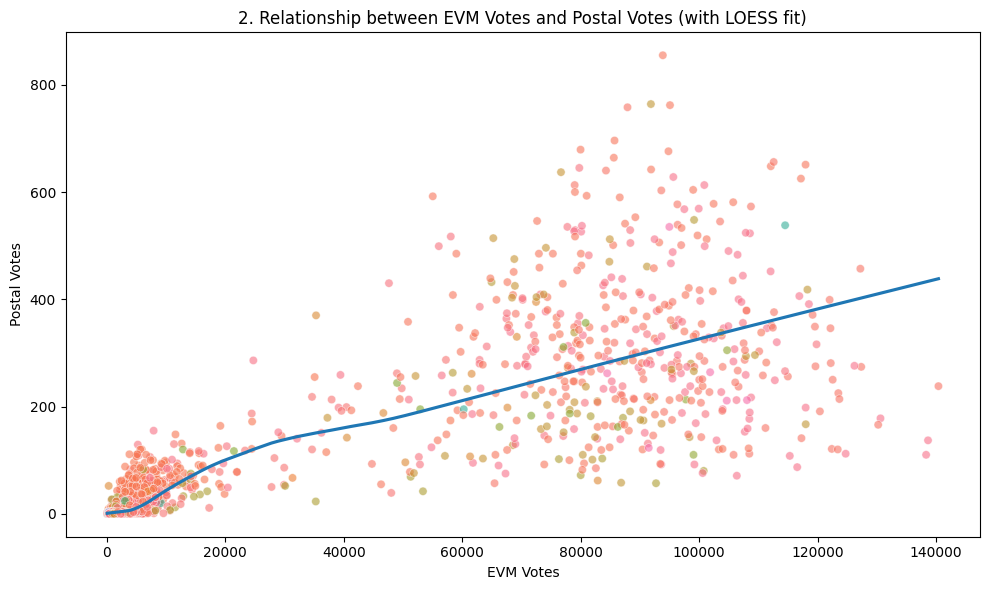

In [12]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='EVM Votes', y='Postal Votes', hue='Party', data=df, legend=False, alpha=0.6)
sns.regplot(x='EVM Votes', y='Postal Votes', data=df, scatter=False, lowess=True)
plt.title(f'{plot_no}. Relationship between EVM Votes and Postal Votes (with LOESS fit)')
show_fig()
plot_no += 1


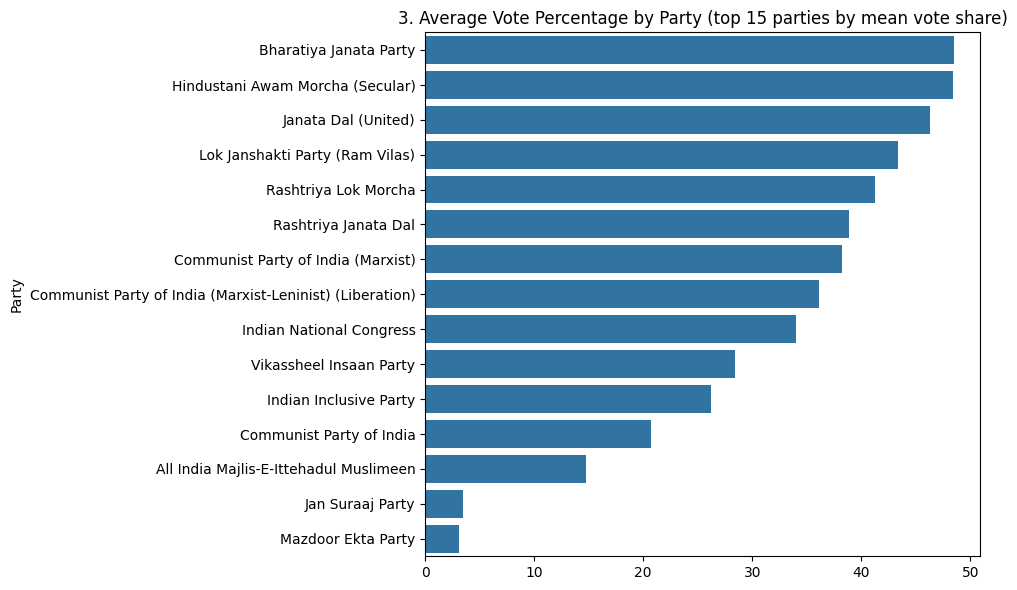

In [13]:
fig = plt.figure(figsize=(10,6))
avg_pct = df.groupby('Party')['Vote Percentage'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=avg_pct.values, y=avg_pct.index)
plt.title(f'{plot_no}. Average Vote Percentage by Party (top 15 parties by mean vote share)')
show_fig()
plot_no += 1


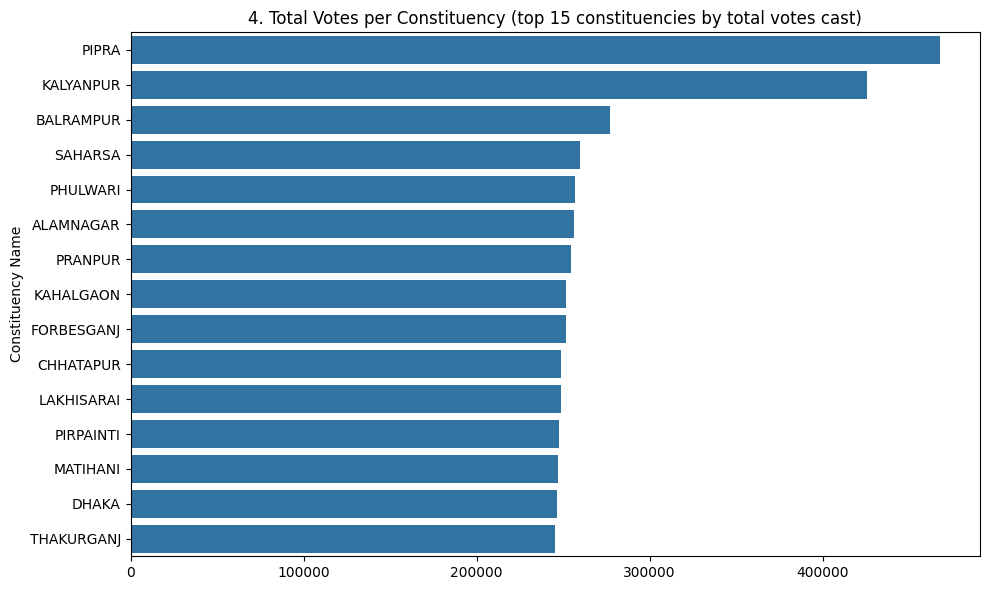

In [14]:
fig = plt.figure(figsize=(10,6))
const_tot = df.groupby('Constituency Name')['Total Votes'].sum().sort_values(ascending=False).head(15)
sns.barplot(x=const_tot.values, y=const_tot.index)
plt.title(f'{plot_no}. Total Votes per Constituency (top 15 constituencies by total votes cast)')
show_fig()
plot_no += 1


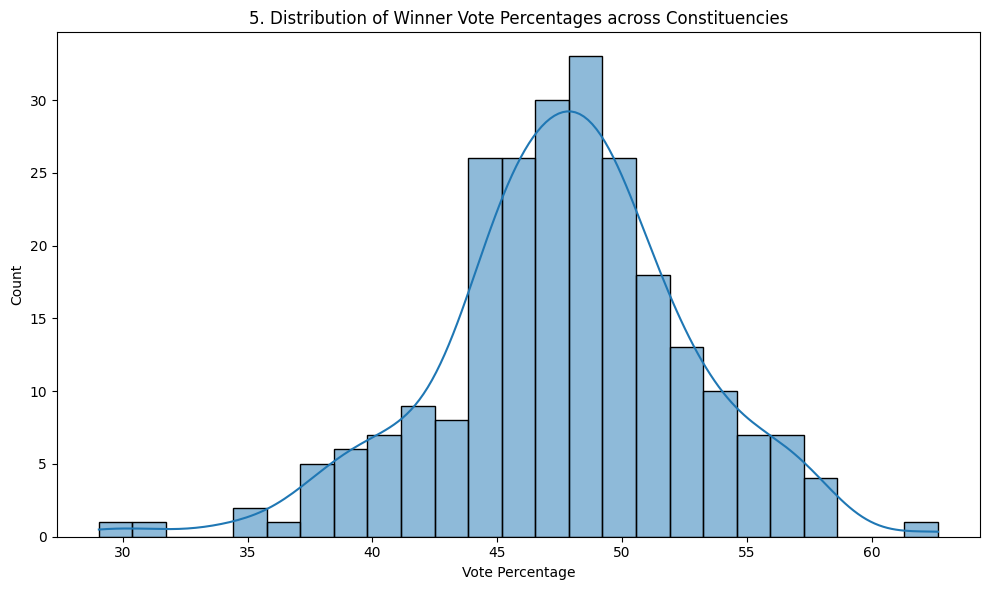

In [15]:
fig = plt.figure(figsize=(10,6))
winners = df.loc[df.groupby('Constituency Name')['Total Votes'].idxmax()]
sns.histplot(winners['Vote Percentage'], bins=25, kde=True)
plt.title(f'{plot_no}. Distribution of Winner Vote Percentages across Constituencies')
show_fig()
plot_no += 1


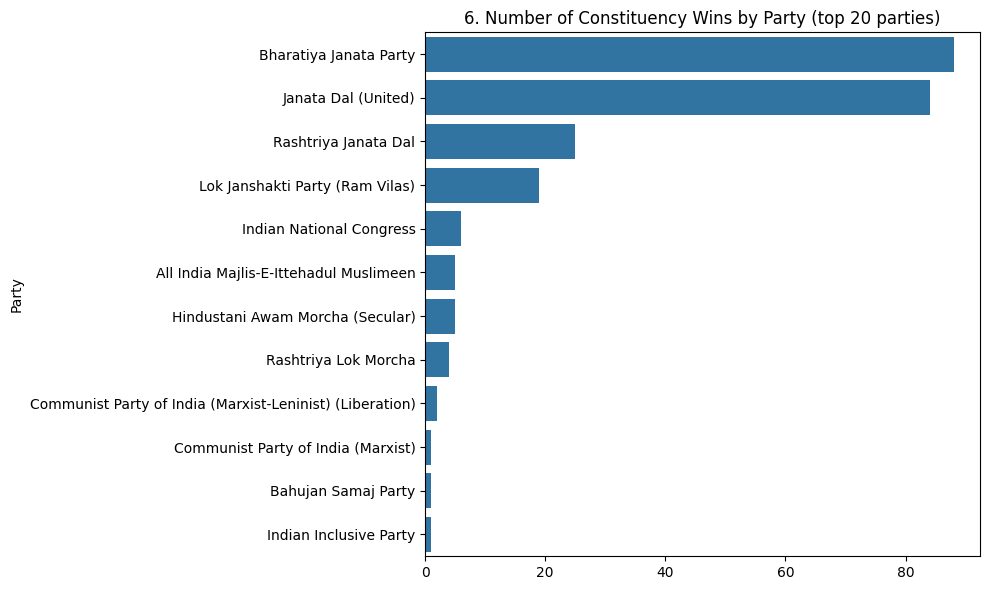

In [16]:
fig = plt.figure(figsize=(10,6))
wins_by_party = winners['Party'].value_counts().head(20)
sns.barplot(x=wins_by_party.values, y=wins_by_party.index)
plt.title(f'{plot_no}. Number of Constituency Wins by Party (top 20 parties)')
show_fig()
plot_no += 1


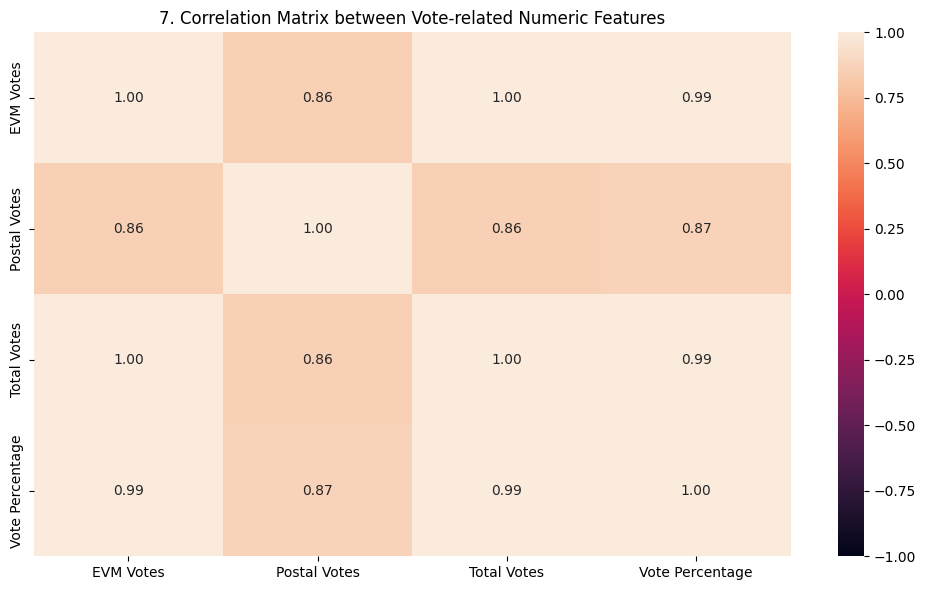

In [17]:
fig = plt.figure(figsize=(10,6))
num_df = df[['EVM Votes','Postal Votes','Total Votes','Vote Percentage']].apply(pd.to_numeric, errors='coerce')
corr = num_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title(f'{plot_no}. Correlation Matrix between Vote-related Numeric Features')
show_fig()
plot_no += 1


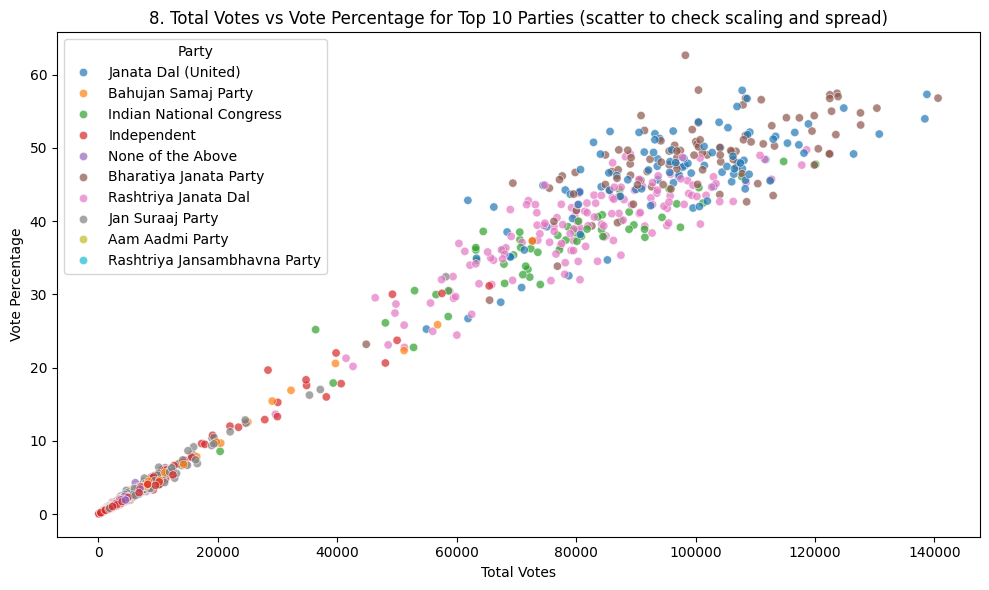

In [18]:
fig = plt.figure(figsize=(10,6))
top_parties = df['Party'].value_counts().nlargest(10).index
sns.scatterplot(x='Total Votes', y='Vote Percentage', hue='Party', data=df[df['Party'].isin(top_parties)], alpha=0.7)
plt.title(f'{plot_no}. Total Votes vs Vote Percentage for Top 10 Parties (scatter to check scaling and spread)')
show_fig()
plot_no += 1


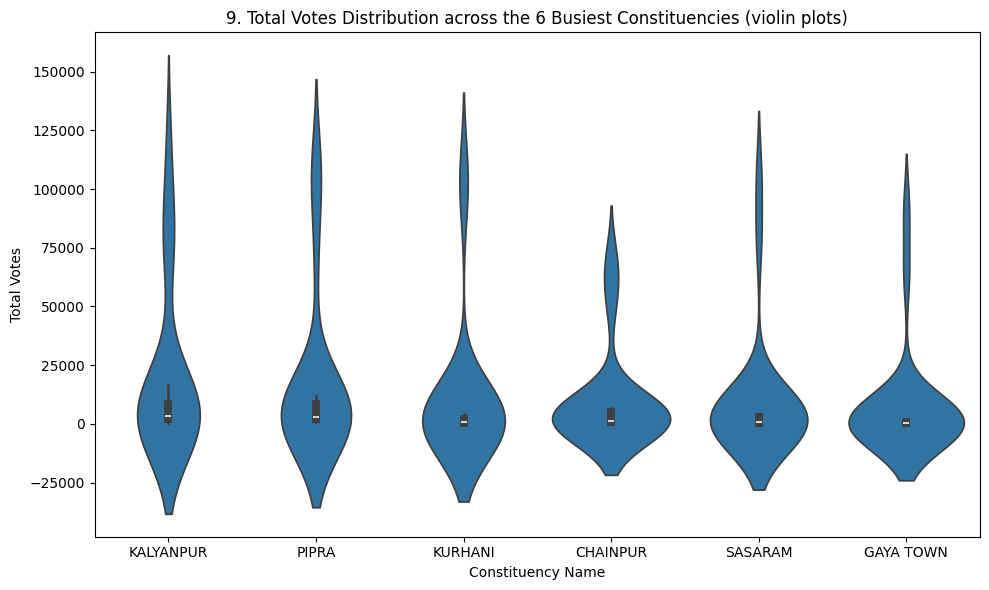

In [19]:
fig = plt.figure(figsize=(10,6))
top_const = df['Constituency Name'].value_counts().nlargest(6).index
sns.violinplot(x='Constituency Name', y='Total Votes', data=df[df['Constituency Name'].isin(top_const)])
plt.title(f'{plot_no}. Total Votes Distribution across the 6 Busiest Constituencies (violin plots)')
show_fig()
plot_no += 1


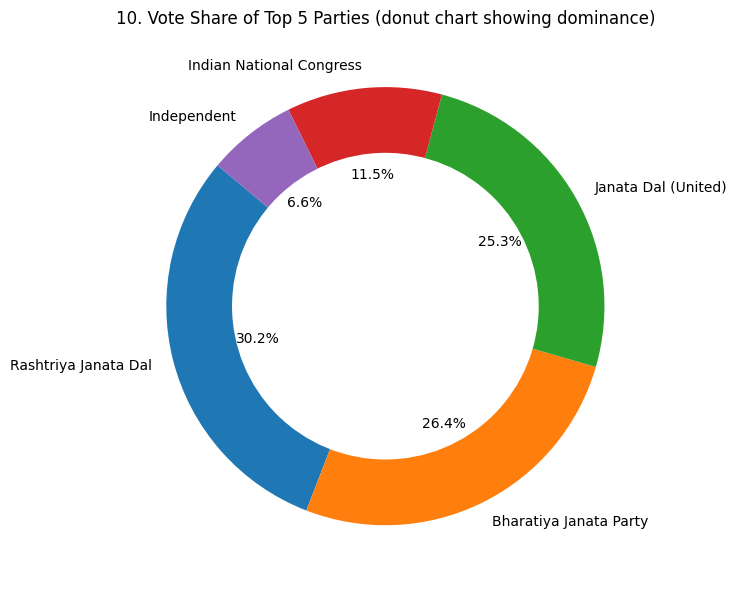

In [20]:
fig = plt.figure(figsize=(10,6))
party_votes = df.groupby('Party')['Total Votes'].sum().sort_values(ascending=False).head(5)
plt.pie(party_votes.values, labels=party_votes.index, autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)
plt.title(f'{plot_no}. Vote Share of Top 5 Parties (donut chart showing dominance)')
show_fig()
plot_no += 1


# MultiLinear Regression Prediction

In [21]:
# Selecting independent (X) and dependent (y) variables
# We use EVM Votes and Postal Votes to predict Total Votes
X = df[['EVM Votes', 'Postal Votes']]
y = df['Total Votes']

In [22]:
# Train–test split (to evaluate model performance)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Creating and training the Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
model.score(X_test, y_test) * 100

100.0

In [25]:
# Here We can show our Prediction Accurecy is 100 %

In [26]:
# Making predictions on the test dataset
y_pred = model.predict(X_test)

In [27]:
# Checking model performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)       # Mean Squared Error
r2 = r2_score(y_test, y_pred)                 # R² Score (closer to 1 means better)
print("Mean Squared Error :", mse)
print("R² Score :", r2)

Mean Squared Error : 2.0646106235839525e-22
R² Score : 1.0


In [28]:
# Displaying model coefficients for interpretation
print("Intercept :", model.intercept_)
print("Coefficients for EVM Votes and Postal Votes:", model.coef_)

Intercept : 7.275957614183426e-12
Coefficients for EVM Votes and Postal Votes: [1. 1.]


In [29]:
# Example values to predict
evm = 100000
postal = 300

new_prediction = model.predict([[evm, postal]])
print("Predicted Total Votes for provided values:", new_prediction[0])

Predicted Total Votes for provided values: 100299.99999999997
